 Equação do Calor em 2D

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#parametros do problema
nx, ny = 50, 50 # numero de pontos na malha
dx = dy = 1.0 # espaçamento 
kappa = 1.0 # difusividade termica (condutivade termica / densidade * capacidade especifica de calor a pressao constante)
dt = 0.1 # passo de tempo
it = 500 # numero de iteraçooes

In [27]:
#condiçoes iniciais
T = np.zeros ((nx, ny)) #temperatura inicial 
# fonte quente no centro
T[nx//2 - 5:nx//2 + 5, ny//2 - 5:ny//2 + 5] = 100  

# difusividade (aqui podemos simular varios materiais)
# devemos garantir a estabilidade kappa * dt / dx**2 <= 0.25
K = np.ones((nx, ny)) * kappa
K[:, ny//2:] = 0.5 * kappa   # metade direita com menor difusividade

In [7]:
#evolução do sistema
def evolucao(T ,K):
    T_new = T.copy()
    # cálculo com diferenças finitas (Laplaciano)
    T_new[1:-1, 1:-1] += (dt/dx**2) * (
        K[1:-1, 1:-1] *
        (T[2:, 1:-1] + T[:-2, 1:-1] + T[1:-1, 2:] + T[1:-1, :-2] - 4 * T[1:-1, 1:-1])
    )
    # condições de contorno fixas (bordas em 0°C)
    T_new[0, :] = 0
    T_new[-1, :] = 0
    T_new[:, 0] = 0
    T_new[:, -1] = 0
    return T_new

print(T)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


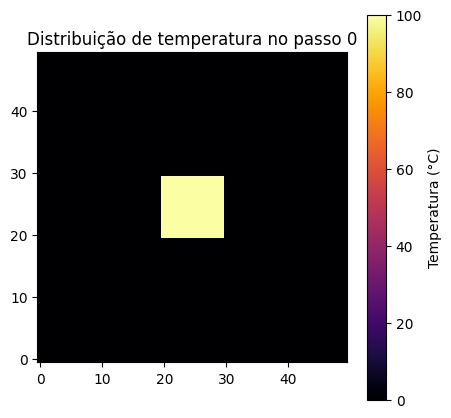

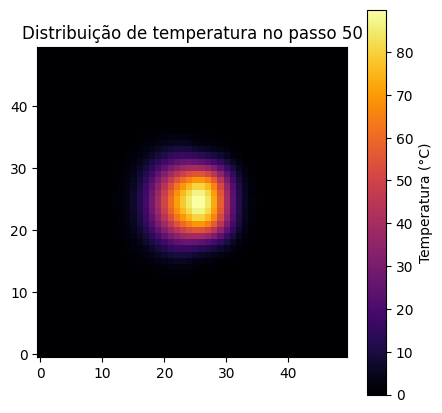

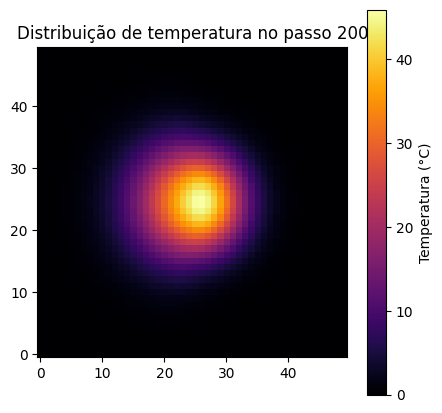

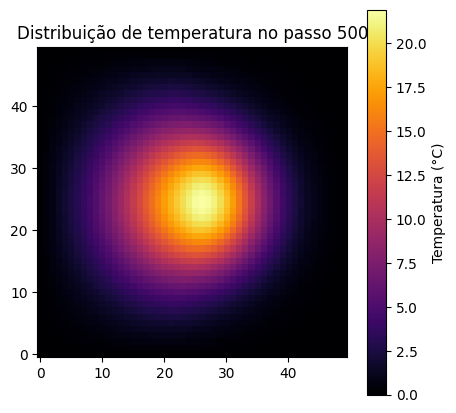

In [26]:
#simulaçao de fato
momentos = [0, 50, 200, 500]
resultados = {}

# resetar condição inicial
T = np.zeros((nx, ny))
T[nx//2 - 5:nx//2 + 5, ny//2 - 5:ny//2 + 5] = 100

for passo in range(it + 1):
    if passo in momentos:
        resultados[passo] = T.copy()
    T = evolucao(T, K)

# plotar as figuras
figs = []
for passo, T_fig in resultados.items():
    plt.figure(figsize=(5,5))
    plt.imshow(T_fig, cmap='inferno', origin='lower')
    plt.colorbar(label="Temperatura (°C)")
    plt.title(f"Distribuição de temperatura no passo {passo}")
    figs.append(plt.gcf())
    plt.show()